# Aula06.Ex05 - Desenhando estrela com triângulos

Resolução do exercício proposto na Aula04: 'desenhar uma estrela usando apenas primitivas de triangulos'.

### Primeiro, vamos importar as bibliotecas necessárias.
Verifique no código anterior um script para instalar as dependências necessárias (OpenGL e GLFW) antes de prosseguir.

In [101]:
import glfw
from OpenGL.GL import *
import OpenGL.GL.shaders
import numpy as np
import math

### Inicializando janela

In [102]:
glfw.init()
glfw.window_hint(glfw.VISIBLE, glfw.FALSE);
window = glfw.create_window(700, 700, "Triângulos", None, None)
glfw.make_context_current(window)

### Capturando eventos de teclado e mouse

In [103]:
def key_event(window,key,scancode,action,mods):
    print('[key event] key=',key)
    print('[key event] scancode=',scancode)
    print('[key event] action=',action)
    print('[key event] mods=',mods)
    print('-------')
    
glfw.set_key_callback(window,key_event)

def mouse_event(window,button,action,mods):
    print('[mouse event] button=',button)
    print('[mouse event] action=',action)
    print('[mouse event] mods=',mods)
    print('-------')
glfw.set_mouse_button_callback(window,mouse_event)

### GLSL (OpenGL Shading Language)

Aqui veremos nosso primeiro código GLSL.

É uma linguagem de shading de alto nível baseada na linguagem de programação C.

Nós estamos escrevendo código GLSL como se "strings" de uma variável (mas podemos ler de arquivos texto). Esse código, depois, terá que ser compilado e linkado ao nosso programa. 

Iremos aprender GLSL conforme a necessidade do curso. Usarmos uma versão do GLSL mais antiga, compatível com muitos dispositivos.

### GLSL para Vertex Shader

No Pipeline programável, podemos interagir com Vertex Shaders.

No código abaixo, estamos fazendo o seguinte:

* Definindo uma variável chamada position do tipo vec2.
* Usamos vec2, pois nosso programa (na CPU) irá enviar apenas duas coordenadas para plotar um ponto. Podemos mandar três coordenadas (vec3) e até mesmo quatro coordenadas (vec4).
* void main() é o ponto de entrada do nosso programa (função principal)
* gl_Position é uma variável especial do GLSL. Variáveis que começam com 'gl_' são desse tipo. Nesse caso, determina a posição de um vértice. Observe que todo vértice tem 4 coordenadas, por isso nós combinamos nossa variável vec2 com uma variável vec4.

In [104]:
vertex_code = """
        attribute vec2 position;
        void main(){
            gl_Position = vec4(position,0.0,1.0);
        }
        """

### GLSL para Fragment Shader

No Pipeline programável, podemos interagir com Fragment Shaders.

No código abaixo, estamos fazendo o seguinte:

* void main() é o ponto de entrada do nosso programa (função principal)
* gl_FragColor é uma variável especial do GLSL. Variáveis que começam com 'gl_' são desse tipo. Nesse caso, determina a cor de um fragmento. Nesse caso é um ponto, mas poderia ser outro objeto (ponto, linha, triangulos, etc).

In [105]:
fragment_code = """
        void main(){
            gl_FragColor = vec4(0.0, 0.0, 0.0, 1.0);
        }
        """

### Requisitando slot para a GPU para nossos programas Vertex e Fragment Shaders

In [106]:
# Request a program and shader slots from GPU
program  = glCreateProgram()
vertex   = glCreateShader(GL_VERTEX_SHADER)
fragment = glCreateShader(GL_FRAGMENT_SHADER)


### Associando nosso código-fonte aos slots solicitados

In [107]:
# Set shaders source
glShaderSource(vertex, vertex_code)
glShaderSource(fragment, fragment_code)

### Compilando o Vertex Shader

Se há algum erro em nosso programa Vertex Shader, nosso app para por aqui.

In [108]:
# Compile shaders
glCompileShader(vertex)
if not glGetShaderiv(vertex, GL_COMPILE_STATUS):
    error = glGetShaderInfoLog(vertex).decode()
    print(error)
    raise RuntimeError("Erro de compilacao do Vertex Shader")


### Compilando o Fragment Shader

Se há algum erro em nosso programa Fragment Shader, nosso app para por aqui.

In [109]:
glCompileShader(fragment)
if not glGetShaderiv(fragment, GL_COMPILE_STATUS):
    error = glGetShaderInfoLog(fragment).decode()
    print(error)
    raise RuntimeError("Erro de compilacao do Fragment Shader")

### Associando os programas compilado ao programa principal

In [110]:
# Attach shader objects to the program
glAttachShader(program, vertex)
glAttachShader(program, fragment)


### Linkagem do programa

In [111]:
# Build program
glLinkProgram(program)
if not glGetProgramiv(program, GL_LINK_STATUS):
    print(glGetProgramInfoLog(program))
    raise RuntimeError('Linking error')
    
# Make program the default program
glUseProgram(program)

### Preparando dados para enviar a GPU

Nesse momento, nós compilamos nossos Vertex e Program Shaders para que a GPU possa processá-los.

Por outro lado, as informações de vértices geralmente estão na CPU e devem ser transmitidas para a GPU.


### Desenharemos 10 triângulos usando vértices do círculo interno (com pentágono inscrito) e círculo externo.

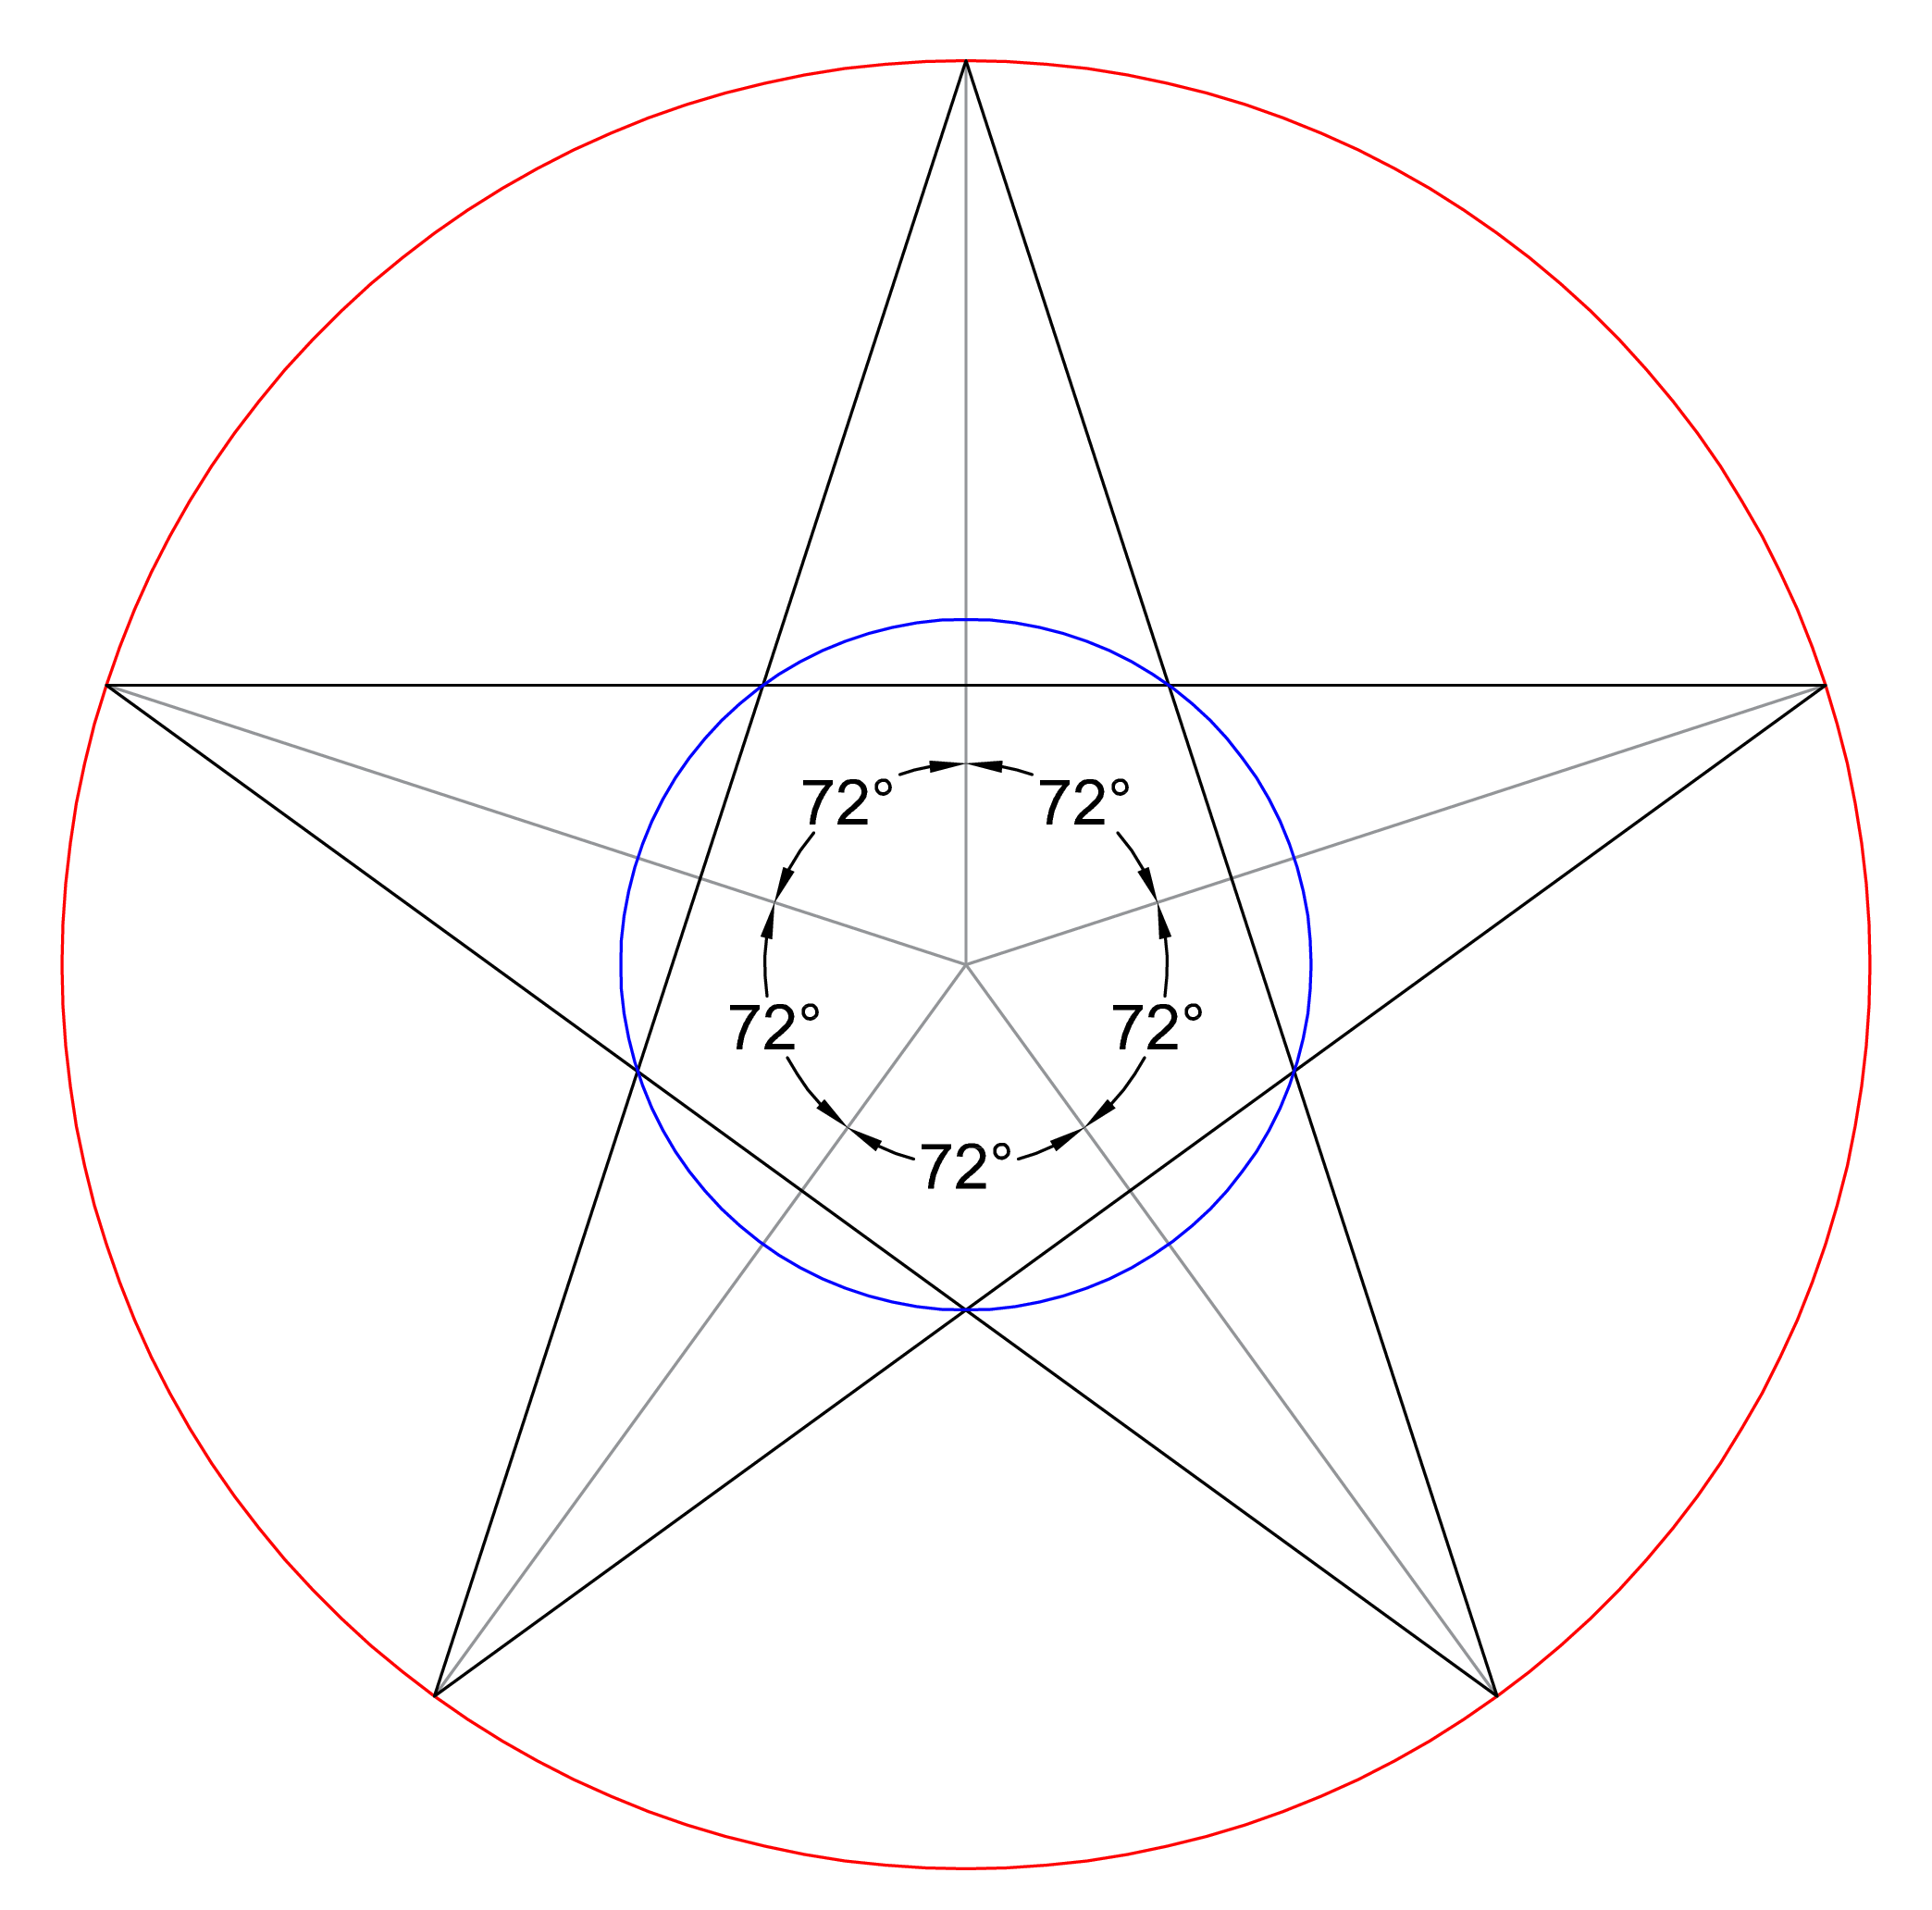

In [112]:
import math

# preparando espaço para 5 vértices usando 2 coordenadas (x,y)
vertices = np.zeros(15, [("position", np.float32, 2)])

PI = math.pi

# pontos círculo interno
r1 = 0.25 # raio do nosso círculo interno

c1_angulo_v1 = 90 - 36
c1_rad_v1 = math.radians(c1_angulo_v1)

c1_angulo_v2 = c1_angulo_v1 - 72 
c1_rad_v2= math.radians(c1_angulo_v2)

c1_angulo_v3 = c1_angulo_v2 - 72 
c1_rad_v3= math.radians(c1_angulo_v3)
                  
c1_angulo_v4 = c1_angulo_v3 - 72
c1_rad_v4 = math.radians(c1_angulo_v4)

c1_angulo_v5 = c1_angulo_v4 - 72
c1_rad_v5 = math.radians(c1_angulo_v5)


# pontos círculo externo
r2 = r1*2.618 # raio do nosso círculo externo

c2_angulo_v1 = 90
c2_rad_v1 = math.radians(c2_angulo_v1)

c2_angulo_v2 = c2_angulo_v1 - 72 
c2_rad_v2= math.radians(c2_angulo_v2)

c2_angulo_v3 = c2_angulo_v2 - 72 
c2_rad_v3= math.radians(c2_angulo_v3)
                  
c2_angulo_v4 = c2_angulo_v3 - 72
c2_rad_v4 = math.radians(c2_angulo_v4)

c2_angulo_v5 = c2_angulo_v4 - 72
c2_rad_v5 = math.radians(c2_angulo_v5)

vertices['position'][0] = [ r1*math.cos(c1_rad_v2), r1*math.sin(c1_rad_v2) ]
vertices['position'][1] = [ r1*math.cos(c1_rad_v4), r1*math.sin(c1_rad_v4) ]
vertices['position'][2] = [ r2*math.cos(c2_rad_v1), r2*math.sin(c2_rad_v1) ]

vertices['position'][3] = [ r1*math.cos(c1_rad_v3), r1*math.sin(c1_rad_v3) ]
vertices['position'][4] = [ r1*math.cos(c1_rad_v5), r1*math.sin(c1_rad_v5) ]
vertices['position'][5] = [ r2*math.cos(c2_rad_v2), r2*math.sin(c2_rad_v2) ]

vertices['position'][6] = [ r1*math.cos(c1_rad_v1), r1*math.sin(c1_rad_v1) ]
vertices['position'][7] = [ r1*math.cos(c1_rad_v4), r1*math.sin(c1_rad_v4) ]
vertices['position'][8] = [ r2*math.cos(c2_rad_v3), r2*math.sin(c2_rad_v3) ]

vertices['position'][9] = [ r1*math.cos(c1_rad_v2), r1*math.sin(c1_rad_v2) ]
vertices['position'][10] = [ r1*math.cos(c1_rad_v5), r1*math.sin(c1_rad_v5) ]
vertices['position'][11] = [ r2*math.cos(c2_rad_v4), r2*math.sin(c2_rad_v4) ]

vertices['position'][12] = [ r1*math.cos(c1_rad_v1), r1*math.sin(c1_rad_v1) ]
vertices['position'][13] = [ r1*math.cos(c1_rad_v3), r1*math.sin(c1_rad_v3) ]
vertices['position'][14] = [ r2*math.cos(c2_rad_v5), r2*math.sin(c2_rad_v5) ]


In [113]:
# # SOLUCAO ALTERNATIVA USANDO TRIANGLE_FAN
# # preenchendo as coordenadas de cada vértice

# DegToRad = math.pi / 180;

# cx = 0.0
# cy = 0.0

# r = 1.0


# # preparando espaço para 12 vértices usando 2 coordenadas (x,y)
# vertices = np.zeros(12, [("position", np.float32, 2)])

# vertices['position'][0] = [0.0,0.0]




# count = 1;
# i = 0.0
# while(i <= 360.0):
#     DegInRad = i * 360.0/10.0 * DegToRad

#     if(count%2!=0):
#         x = cx + r*math.cos(DegInRad)
#         y = cy + r*math.sin(DegInRad)
#         vertices['position'][count] = [x,y]
#         print(x,y)
#     else:
#         x = cx + (r/2)*math.cos(DegInRad)
#         y = cy + (r/2)*math.sin(DegInRad)
#         vertices['position'][count] = [x,y]
#         print(x,y)
        
        
    
#     count += 1
#     i += 360.0/10.0




### Para enviar nossos dados da CPU para a GPU, precisamos requisitar um slot.

In [114]:
# Request a buffer slot from GPU
buffer = glGenBuffers(1)
# Make this buffer the default one
glBindBuffer(GL_ARRAY_BUFFER, buffer)


### Abaixo, nós enviamos todo o conteúdo da variável vertices.

Veja os parâmetros da função glBufferData [https://www.khronos.org/registry/OpenGL-Refpages/gl4/html/glBufferData.xhtml]

In [115]:
# Upload data
glBufferData(GL_ARRAY_BUFFER, vertices.nbytes, vertices, GL_DYNAMIC_DRAW)
glBindBuffer(GL_ARRAY_BUFFER, buffer)

### Associando variáveis do programa GLSL (Vertex Shaders) com nossos dados

Primeiro, definimos o byte inicial e o offset dos dados.

In [116]:
# Bind the position attribute
# --------------------------------------
stride = vertices.strides[0]
offset = ctypes.c_void_p(0)


Em seguida, soliciamos à GPU a localização da variável "position" (que guarda coordenadas dos nossos vértices). Nós definimos essa variável no Vertex Shader.

In [117]:
loc = glGetAttribLocation(program, "position")
glEnableVertexAttribArray(loc)

A partir da localização anterior, nós indicamos à GPU onde está o conteúdo (via posições stride/offset) para a variável position (aqui identificada na posição loc).

Outros parâmetros:

* Definimos que possui duas coordenadas
* Que cada coordenada é do tipo float (GL_FLOAT)
* Que não se deve normalizar a coordenada (False)

Mais detalhes: https://www.khronos.org/registry/OpenGL-Refpages/gl4/html/glVertexAttribPointer.xhtml

In [118]:
glVertexAttribPointer(loc, 2, GL_FLOAT, False, stride, offset)

### Nesse momento, nós exibimos a janela!


In [119]:
glfw.show_window(window)

### Loop principal da janela.
Enquanto a janela não for fechada, esse laço será executado. É neste espaço que trabalhamos com algumas interações com a OpenGL.

A novidade agora é a função glDrawArrays()

Tal função recebe o tipo de primitiva (GL_TRIANGLES), o índice inicial do array de vértices (vamos mostrar todos os três vértices, por isso começamos com 0) e a quantidade de vértices ( len(vertices) ).

In [120]:
while not glfw.window_should_close(window):

    glfw.poll_events() 

    glPolygonMode(GL_FRONT_AND_BACK,GL_LINE) ## ative esse comando para enxergar os triângulos    
    glClear(GL_COLOR_BUFFER_BIT) 
    glClearColor(1.0, 1.0, 1.0, 1.0)
    
    
    glDrawArrays(GL_TRIANGLES, 0, len(vertices))

    glfw.swap_buffers(window)

glfw.terminate()

# Exercício

Modifique esse código para desenhar uma estrela usando apenas primitivas de triangulos.
